In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
def predict(hypothesis, theta, X):
    return hypothesis(theta, X)

In [16]:
def hypothesis(theta, X):
    '''
    Returns a vertical vector of shape (m,1)
    Here theta is a vertical vector of shape (n+1,1) and X is a matrix of shape (m, n+1)
    (m, n+1) @ (n+1,1) -> (m,1)
    '''
    return X@theta

In [17]:
def cost(hypothesis, theta, X, y):
    '''
    Returns a single number that is the cost.
    Here theta is a vertical vector of shape (n+1,1), X is a matrix of shape (m, n+1) and y is a vertical vector of (m,1)
    '''
    m = len(y)
    diff = hypothesis(theta, X) - y
    J = np.sum(diff.T @ diff)/(2*m) #vectorised calculation
    return J

In [18]:
def gradient(hypothesis, theta, X, y):
    '''
    Returns a vertical vector of (n+1,1) which represents the gradient of the cost function.
    Here theta is a vertical vector of shape (n+1,1), X is a matrix of shape (m, n+1) and y is a vertical vector of (m,1)
    '''
    m = len(y)
    grad = (X.T @ (hypothesis(theta, X) - y))/m
    return grad

In [19]:
def update_coeff(gradient, hypothesis, theta, X, y, learning_rate):
    J_prev = 1
    J = 0
    iteration = 0

    while abs(J_prev - J) > 0:
        J_prev = J
        J = cost(hypothesis, theta, X, y)
        theta = theta - learning_rate * gradient(hypothesis, theta, X, y)
        print('Cost for iteration {}: {}'.format(iteration, J))
        iteration += 1

    return theta

In [20]:
def prep(df):
    dat = np.matrix(df)
    X = dat[:,:-1]
    y = dat[:,-1]

    m, n = np.shape(X)

    ones = np.matrix(np.ones(m)).T
    X = np.concatenate([ones,X], axis = 1)
    theta = np.matrix(np.zeros(n+1)).T
    return theta, X, y

In [21]:
number_of_examples = 10
points = np.matrix([np.array([i for i in range(number_of_examples)]), np.array([0.4*i+3+50*np.random.normal(0,1) for i in range(number_of_examples)])]).T
df = pd.DataFrame(points, columns = ['X', 'y'])

In [22]:
df

,X,y
0,0.0,-53.595953
1,1.0,-53.333629
2,2.0,-16.570839
3,3.0,82.089634
4,4.0,-88.177660
5,5.0,12.438729
6,6.0,47.849049
7,7.0,-17.196715
8,8.0,-15.058430
9,9.0,-39.054635


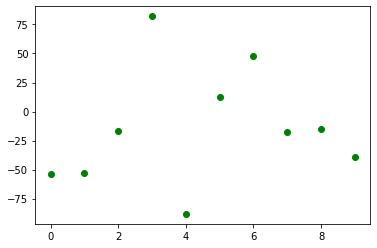

In [23]:
plt.plot(df['X'],df['y'], 'go')

## Train Test split

In [24]:
def train_test_split(X, y, test_size = 0.2):
    m = len(y)
    test_lim = int(test_size*m)
    X_test, X_train, y_test, y_train = X[:test_lim], X[test_lim:], y[:test_lim], y[test_lim:]
    return X_train, X_test, y_train, y_test

In [25]:
theta, X, y = prep(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
theta = update_coeff(gradient, hypothesis, theta, X,y, learning_rate = 0.01)

Cost for iteration 0: 1249.8801894046205
Cost for iteration 1: 1231.8906663408611
Cost for iteration 2: 1222.63489225478
Cost for iteration 3: 1217.7562203383948
Cost for iteration 4: 1215.0719005154815
Cost for iteration 5: 1213.4883361051868
Cost for iteration 6: 1212.4576118971747
Cost for iteration 7: 1211.7052069447595
Cost for iteration 8: 1211.09357478
Cost for iteration 9: 1210.5537951502642
Cost for iteration 10: 1210.0513305605446
Cost for iteration 11: 1209.5688698112044
Cost for iteration 12: 1209.097732364789
Cost for iteration 13: 1208.633561810638
Cost for iteration 14: 1208.1741682288314
Cost for iteration 15: 1207.7184471834373
Cost for iteration 16: 1207.2658381224378
Cost for iteration 17: 1206.8160530281134
Cost for iteration 18: 1206.368940466779
Cost for iteration 19: 1205.9244174755256
Cost for iteration 20: 1205.4824354362804
Cost for iteration 21: 1205.042962977995
Cost for iteration 22: 1204.6059774101736
Cost for iteration 23: 1204.1714604307247
Cost for iter

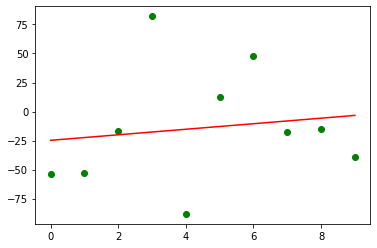

In [27]:
xplt = np.array([i for i in range(number_of_examples)])
slope = np.sum(theta[1])
intercept = np.sum(theta[0])
yplt = slope*xplt + intercept
plt.plot(df['X'],df['y'], 'go')
plt.plot(xplt, yplt, 'r-')